In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Upload zip file
zip_file_name = '/content/Colombia_ National Survey of Income and Expenses -20230915T161555Z-001.zip'

# Directory where content will be extracted
extraction_path = '/content/extracted/'

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)


# Persona



In [4]:
# Load .txt file
lg_ml_persona = '/content/extracted/Colombia_ National Survey of Income and Expenses /Ig_ml_persona/Ig_ml_persona/Ig_ml_persona.txt'

# Read .txt file with different encodings until successful
encodings_to_try = ['utf-8', 'latin-1', 'ISO-8859-1', 'utf-16']

for encoding in encodings_to_try:
    try:
        df_persona = pd.read_csv(lg_ml_persona, sep='\t', encoding=encoding)
        break  # Stop trying encodings if successful
    except UnicodeDecodeError:
        continue  # Try the next encoding

# Display the first few rows of the DataFrame
display(df_persona.head())

,VIVIENDA,HOGAR,NUMERO_ENCUESTA,SECUENCIA_ENCUESTA,SECUENCIA_PADRE,ORDEN,REL_NUMERO_ENCUESTA,REL_SECUENCIA_ENCUESTA,P200,P6016,...,P6180S2,P6190,P6190S1,P6200,P6200S1,P6210,P6210S1,P6220,CODIGO_ENIG,FACTOR_EXPANSION_EC_E1
0,5961,1,6,1,1,1,5,1,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,59610101,441.933993
1,8458,1,6,2,1,2,5,1,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,6.0,5.0,4.0,84580102,244.305229
2,40728,1,6,1,1,1,5,1,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,4.0,8.0,NaN,407280101,175.399884
3,41343,1,6,6,1,6,5,1,NaN,6.0,...,NaN,2.0,NaN,2.0,NaN,4.0,6.0,NaN,413430106,43.344636
4,36669,1,6,9,1,9,5,1,NaN,8.0,...,2000.0,1.0,68000.0,2.0,NaN,3.0,3.0,NaN,366690109,42.861854


In [5]:
df_persona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165381 entries, 0 to 165380
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   VIVIENDA                165381 non-null  int64  
 1   HOGAR                   165381 non-null  int64  
 2   NUMERO_ENCUESTA         165381 non-null  int64  
 3   SECUENCIA_ENCUESTA      165381 non-null  int64  
 4   SECUENCIA_PADRE         165381 non-null  int64  
 5   ORDEN                   165381 non-null  int64  
 6   REL_NUMERO_ENCUESTA     165381 non-null  int64  
 7   REL_SECUENCIA_ENCUESTA  165381 non-null  int64  
 8   P200                    42733 non-null   float64
 9   P6016                   165379 non-null  float64
 10  P6020                   165381 non-null  int64  
 11  P6030S1                 162438 non-null  float64
 12  P6030S3                 162432 non-null  float64
 13  P6040                   165381 non-null  int64  
 14  P6050               

In [6]:
list(df_persona.columns)

['VIVIENDA',
 'HOGAR',
 'NUMERO_ENCUESTA',
 'SECUENCIA_ENCUESTA',
 'SECUENCIA_PADRE',
 'ORDEN',
 'REL_NUMERO_ENCUESTA',
 'REL_SECUENCIA_ENCUESTA',
 'P200',
 'P6016',
 'P6020',
 'P6030S1',
 'P6030S3',
 'P6040',
 'P6050',
 'P6080',
 'P6080S1',
 'P6060',
 'P6060S1',
 'P6090',
 'P6140',
 'P6150',
 'P6100',
 'P6110',
 'P6120',
 'P6125',
 'P6160',
 'P6170',
 'P6175',
 'P6180',
 'P6180S1',
 'P6180S2',
 'P6190',
 'P6190S1',
 'P6200',
 'P6200S1',
 'P6210',
 'P6210S1',
 'P6220',
 'CODIGO_ENIG',
 'FACTOR_EXPANSION_EC_E1']

In [22]:
# column_names = [
#     'Household',  # VIVIENDA - Housing
#     'Household_ID',  # HOGAR - Household ID
#     'Survey_ID',  # NUMERO_ENCUESTA - Survey Number
#     'Survey_Sequence',  # SECUENCIA_ENCUESTA - Survey Sequence
#     'Parent_Sequence',  # SECUENCIA_PADRE - Parent Sequence
#     'Order',  # ORDEN - Order
#     'Relative_Survey_ID',  # REL_NUMERO_ENCUESTA - Relative Survey Number
#     'Relative_Survey_Sequence',  # REL_SECUENCIA_ENCUESTA - Relative Survey Sequence
#     'Is_Household_Head',  # P200 - Head of the household?
#     'Household_Hierarchy',  # Order or hierarchy of individuals within the household, with the head of the household being numbered as "1,"
#     'Gender',  # P6020 - Gender
#     'Birth_Month',  # P6030S1 - Birth Month
#     'Birth_Year',  # P6030S3 - Birth Year
#     'Age',  # P6040 - Age
#     'Relationship_with_Head',  # P6050 - Relationship with the head of the household
#     'Cultural_Identity',  # P6080
#     'Indigenous_Group_Membership',  # P6080S1
#     'MissedMeals_DueToLackOfMoney',  # P6060 - Missed Meals Due to Lack of Money
#     'Days_Not_Eating',  # P6060S1 - How many days did the individual not consume three meals?
#     'Healthcare_Affiliation_Status'  # P6090 -
#     'Previous_Healthcare_Affiliation_Status',  # P6140
#     'Months_Since_Last_Healthcare_Affiliation_or_Contribution',  # P6150
#     'Healthcare_Social_Security_Regime',  # P6100
#     'Monthly_Affiliation_Payment_by',  # P6110
#     'Monthly_Affiliation_Payment_Amount',  # P61120
#     'Missed_Medical_Appointments_Last_12_Months',  # P6125
#     'Can_Read_and_Write',  # P6160
#     'Currently_Attending_School',  # P6170
#     'Is_Educational_Institution_Public',  # P6175
#     'Receives_Free_or_Subsidized_Meals_at_School',  # P6180
#     'Meal_Cost_Per_Day_at_School', # P6180S1
#     'Meal_Cost_Per_Day_Elsewhere',  # P6180S2
#     'Scholarship_Received_Last12Months',  # P6190
#     'Amount_Received_Scholarship_Last12Months', # p6190s1
#     'Loans_Received_Last12Months', # p6200
#     'Amount_Received_As_Loans_Last12Months', # p6200s1
#     'Highest_Educational_Level', # p6210
#     'Max_Grade_Approved', # p6210s1
#     'Highest_Educational_Diploma', # p6220
#     'ENIG_Code',
#     'EXPANSION_FACTOR_EC_E1'
# ]


In [8]:
# Define a mapping from old column names to new column names based on data directory
column_mapping = {
    'VIVIENDA': 'Household',
    'HOGAR': 'Household_ID',
    'NUMERO_ENCUESTA': 'Survey_ID',
    'SECUENCIA_ENCUESTA': 'Survey_Sequence',
    'SECUENCIA_PADRE': 'Parent_Sequence',
    'ORDEN': 'Order',
    'REL_NUMERO_ENCUESTA': 'Relative_Survey_ID',
    'REL_SECUENCIA_ENCUESTA': 'Relative_Survey_Sequence',
    'P200': 'Is_Household_Head',
    'P6016': 'Household_Hierarchy',
    'P6020': 'Gender',
    'P6030S1': 'Birth_Month',
    'P6030S3': 'Birth_Year',
    'P6040': 'Age',
    'P6050': 'Relationship_with_Head',
    'P6080': 'Cultural_Identity',
    'P6080S1': 'Indigenous_Group_Membership',
    'P6060': 'MissedMeals_DueToLackOfMoney',
    'P6060S1': 'Days_Not_Eating',
    'P6090': 'Healthcare_Affiliation_Status',
    'P6140': 'Previous_Healthcare_Affiliation_Status',
    'P6150': 'Months_Since_Last_Healthcare_Affiliation_or_Contribution',
    'P6100': 'Healthcare_Social_Security_Regime',
    'P6110': 'Monthly_Affiliation_Payment_by',
    'P6120': 'Monthly_Affiliation_Payment_Amount',
    'P6125': 'Missed_Medical_Appointments_Last_12_Months',
    'P6160': 'Can_Read_and_Write',
    'P6170': 'Currently_Attending_School',
    'P6175': 'Is_Educational_Institution_Public',
    'P6180': 'Receives_Free_or_Subsidized_Meals_at_School',
    'P6180S1': 'Meal_Cost_Per_Day_at_School',
    'P6180S2': 'Meal_Cost_Per_Day_Elsewhere',
    'P6190': 'Scholarship_Received_Last12Months',
    'P6190S1': 'Amount_Received_Scholarship_Last12Months',
    'P6200': 'Loans_Received_Last12Months',
    'P6200S1': 'Amount_Received_As_Loans_Last12Months',
    'P6210': 'Highest_Educational_Level',
    'P6210S1': 'Max_Grade_Approved',
    'P6220': 'Highest_Educational_Diploma',
    'CODIGO_ENIG': 'ENIG_Code',
    'FACTOR_EXPANSION_EC_E1': 'EXPANSION_FACTOR_EC_E1'
}

# Use mapping to rename columns in DataFrame
df_persona.rename(columns=column_mapping, inplace=True)



In [9]:
df_persona.sample(15)

,Household,Household_ID,Survey_ID,Survey_Sequence,Parent_Sequence,Order,Relative_Survey_ID,Relative_Survey_Sequence,Is_Household_Head,Household_Hierarchy,...,Meal_Cost_Per_Day_Elsewhere,Scholarship_Received_Last12Months,Amount_Received_Scholarship_Last12Months,Loans_Received_Last12Months,Amount_Received_As_Loans_Last12Months,Highest_Educational_Level,Max_Grade_Approved,Highest_Educational_Diploma,ENIG_Code,EXPANSION_FACTOR_EC_E1
78879,12759,1,6,7,1,7,5,1,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,6.0,3.0,3.0,127590107,83.800917
95217,1350,1,6,3,1,3,5,1,NaN,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,0.0,NaN,13500103,142.550589
57827,30029,1,6,2,1,2,5,1,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,6.0,5.0,4.0,300290102,30.175351
41269,8325,1,6,3,1,3,5,1,NaN,2.0,...,1000.0,2.0,NaN,2.0,NaN,3.0,3.0,NaN,83250103,87.293757
65393,40790,1,6,4,1,4,5,1,NaN,4.0,...,NaN,2.0,NaN,2.0,NaN,5.0,11.0,2.0,407900104,1219.932967
155644,21645,1,6,2,1,2,5,1,NaN,1.0,...,NaN,2.0,NaN,2.0,NaN,3.0,4.0,NaN,216450102,415.193408
150949,29428,1,6,1,1,1,5,1,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,6.0,5.0,4.0,294280101,NaN
31535,24127,1,6,4,1,4,5,1,NaN,2.0,...,500.0,2.0,NaN,2.0,NaN,3.0,1.0,NaN,241270104,74.073212
69631,19504,1,6,1,1,1,5,1,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,6.0,4.0,2.0,195040101,155.024061
137477,7946,1,6,3,1,3,5,1,NaN,2.0,...,NaN,2.0,NaN,2.0,NaN,1.0,0.0,NaN,79460103,237.170467


In [10]:
df_persona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165381 entries, 0 to 165380
Data columns (total 41 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Household                                                 165381 non-null  int64  
 1   Household_ID                                              165381 non-null  int64  
 2   Survey_ID                                                 165381 non-null  int64  
 3   Survey_Sequence                                           165381 non-null  int64  
 4   Parent_Sequence                                           165381 non-null  int64  
 5   Order                                                     165381 non-null  int64  
 6   Relative_Survey_ID                                        165381 non-null  int64  
 7   Relative_Survey_Sequence                                  165381 non-null  int64  
 8   Is_H

In [11]:
# Convert Highest Educational Level from float to int and replace NaN values with 9 (based on documentation)
df_persona['Highest_Educational_Level'] = df_persona['Highest_Educational_Level'].fillna(9).astype(int)

In [12]:
df_persona['Highest_Educational_Level'].dtypes

dtype('int64')

In [13]:
# Fill missing values with 9 for Birth_Month, Birth_Year, 'Healthcare_Affiliation_Status
df_persona['Birth_Month'] = df_persona['Birth_Month'].fillna(9).astype(int)
df_persona['Birth_Year'] = df_persona['Birth_Year'].fillna(9).astype(int)
df_persona['Healthcare_Affiliation_Status'] = df_persona['Healthcare_Affiliation_Status'].fillna(9).astype(int)

# Format 'Birth_Month' as two-digit month (mm) and 'Birth_Year' as four-digit year (aaaa)
df_persona['Birth_Month'] = df_persona['Birth_Month'].apply(lambda x: f'{x:02}' if x != 9 else 'N/A')
df_persona['Birth_Year'] = df_persona['Birth_Year'].apply(lambda x: f'{x:04}' if x != 9 else 'N/A')



In [14]:
# Sanity check
assert df_persona['Birth_Month'].notna().any()
assert df_persona['Birth_Year'].notna().any()

## Head of Household Distribution by Gender

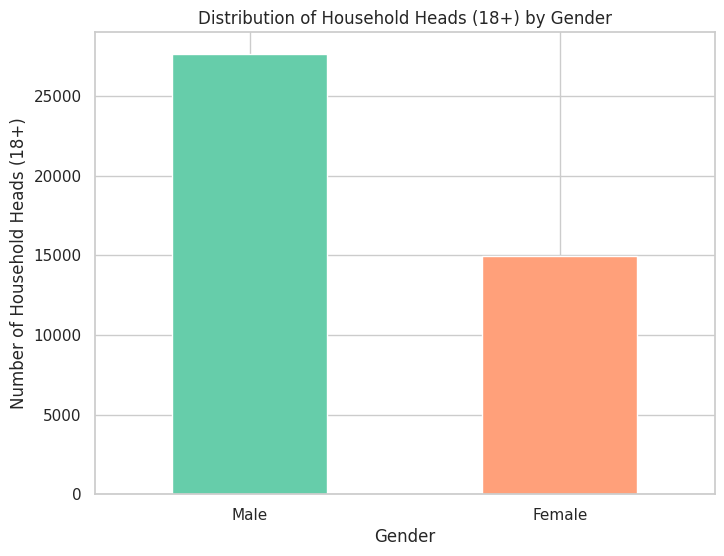

In [24]:
# Filter the DataFrame to keep only rows where Age is greater than 18 and Is_Household_Head is True
df_persona_filtered = df_persona[(df_persona['Age'] > 18) & (df_persona['Is_Household_Head'] == 1)]

# Group the filtered DataFrame by Gender
persona_grouped = df_persona_filtered.groupby('Gender')

# Count the number of individuals in each gender group
gender_counts = persona_grouped.size()

# Plot the bar chart
plt.figure(figsize=(8, 6))
ax = gender_counts.plot(kind='bar', color=['mediumaquamarine', 'lightsalmon'])
plt.xlabel('Gender')
plt.ylabel('Number of Household Heads (18+)')
plt.title('Distribution of Household Heads (18+) by Gender')

# Set custom x-axis labels to match the legend labels
ax.set_xticklabels(['Male', 'Female'], rotation=0)

plt.show();

## Educational Level Distribution by Gender

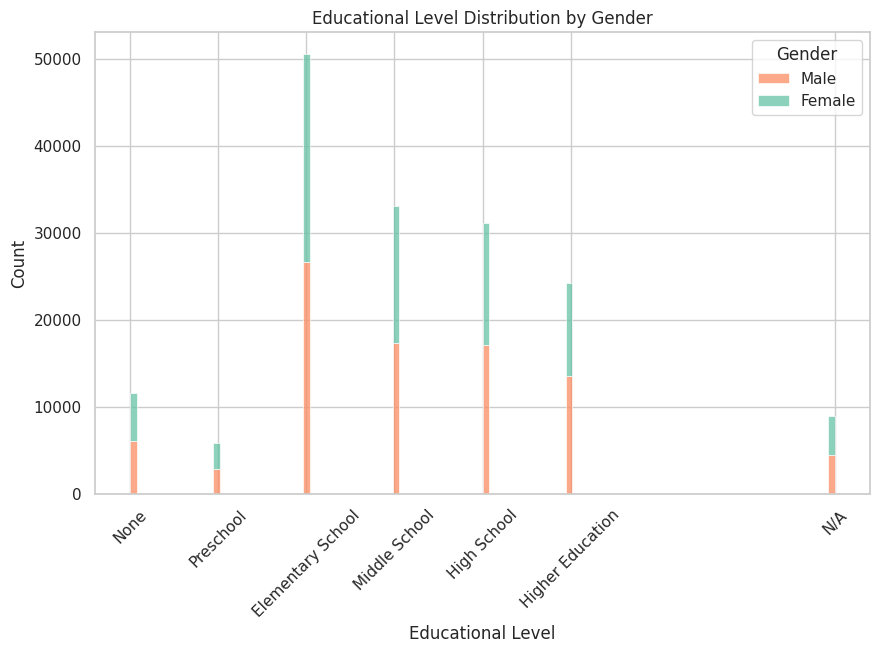

In [17]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df_persona, x='Highest_Educational_Level', hue='Gender', multiple='stack', palette='Set2')

# Set plot labels and title
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.title('Educational Level Distribution by Gender')

# Extract unique values from the 'Highest_Educational_Level' column
unique_education_levels = df_persona['Highest_Educational_Level'].unique()

# Customize the x-axis labels for better readability
education_labels = {
    1 : 'None',
    2 : 'Preschool',
    3 : 'Elementary School',
    4 : 'Middle School',
    5 : 'High School',
    6 : 'Higher Education',
    9 : "N/A"
}

# Manually set the x-axis labels using the unique values
ax.set_xticks(unique_education_levels)
ax.set_xticklabels([education_labels[label] for label in unique_education_levels])

# Specify labels for the legend
legend_labels = ['Male', 'Female']
ax.legend(legend_labels, title='Gender', loc='upper right')

# Show the plot
plt.xticks(rotation=45)
plt.show()


## Age Distribution by Gender

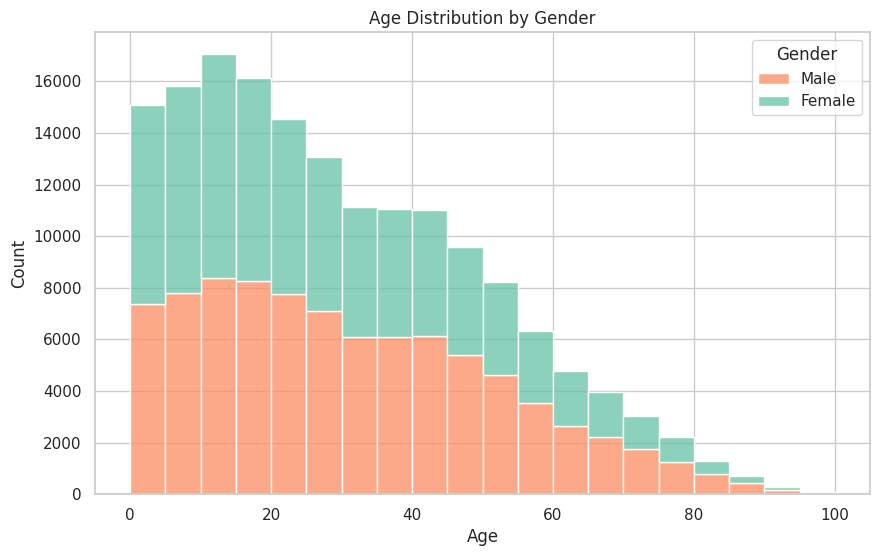

In [18]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create figure and axis
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df_persona, x='Age', hue='Gender', multiple='stack', palette='Set2', bins=20)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Gender')

# Specify labels for the legend
legend_labels = ['Male', 'Female']
ax.legend(legend_labels, title='Gender', loc='upper right')

# Show the plot
plt.show()


## Missed Basic Meals (Breakfast, Lunch, Dinner) Due To Lack of Money Distribution by Gender

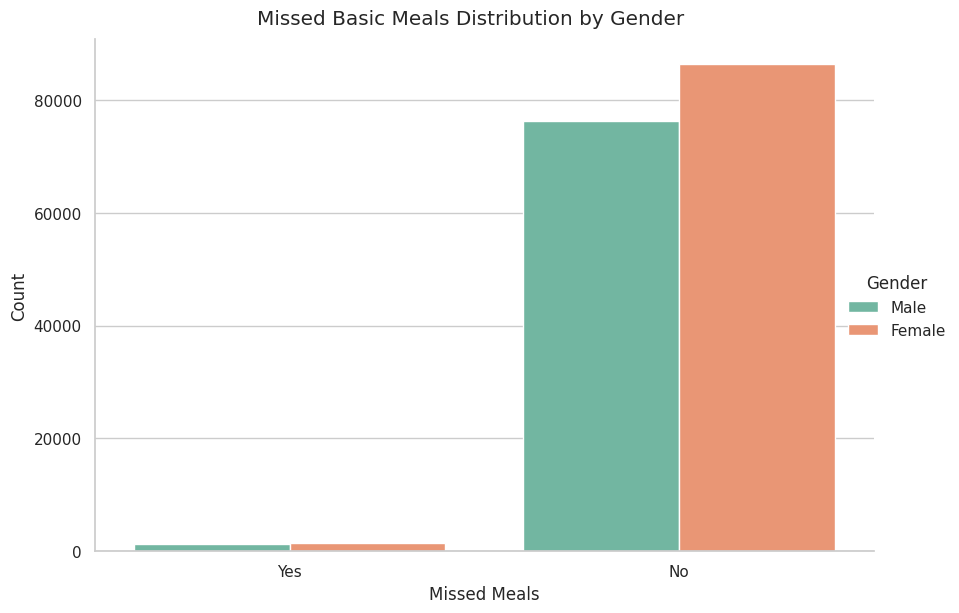

In [20]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure and axis using catplot
g = sns.catplot(
    data=df_persona,
    x='MissedMeals_DueToLackOfMoney',
    kind='count',
    hue='Gender',
    palette='Set2',
    height=6,
    aspect=1.5  # Adjust the aspect ratio for better visibility
)

# Set plot labels and title
g.set_axis_labels('Missed Meals', 'Count')
g.fig.suptitle('Missed Basic Meals Distribution by Gender', y=1.02)

# Manually set the x-axis labels and positions
x_labels = ['Yes', 'No']
g.set_xticklabels(labels=x_labels)
g.set_xticklabels(rotation=0)  # Rotate x-axis labels if needed

# Customize legend labels
legend_labels = ['Male', 'Female']
g._legend.set_title('Gender')
for t, l in zip(g._legend.texts, legend_labels):
    t.set_text(l)

# Show the plot
plt.show()


## Health Insurance Coverage Distribution by Gender

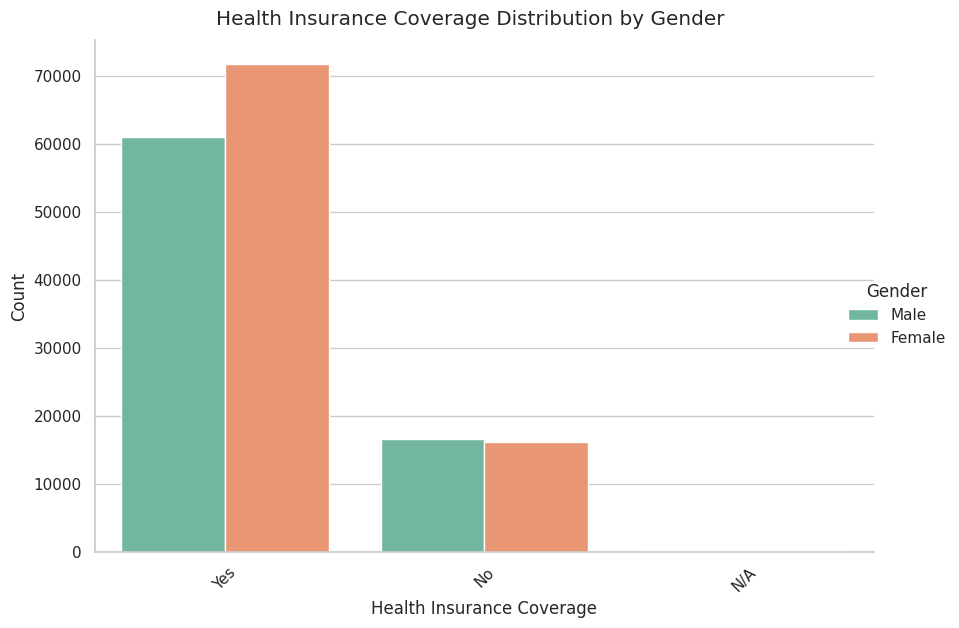

In [21]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure and axis using catplot
g = sns.catplot(
    data=df_persona,
    x='Healthcare_Affiliation_Status',
    kind='count',
    hue='Gender',
    palette='Set2',
    height=6,
    aspect=1.5  # Adjust the aspect ratio for better visibility
)

# Set plot labels and title
g.set_axis_labels('Health Insurance Coverage', 'Count')
g.fig.suptitle('Health Insurance Coverage Distribution by Gender', y=1.02)

# Customize x-axis labels and positions
x_labels = ['Yes', 'No', 'N/A']
g.set_xticklabels(labels=x_labels)
g.set_xticklabels(rotation=45)  # Rotate x-axis labels for better readability

# Customize legend labels
legend_labels = ['Male', 'Female']
g._legend.set_title('Gender')
for t, l in zip(g._legend.texts, legend_labels):
    t.set_text(l)

# Show the plot
plt.show()
